In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [140]:
weather = pd.read_csv('data_fix_temp.txt')

In [114]:
weather

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs
1,2021-02-27 15:00:00,96001,0.000000,0.000000e+00,0,27.3973,21.6059,70.8014,3.433260,12.4580,0.553781,0.000000,0.000000,100564.0,0.0,0.014986,299.737,770.659,908.410,38.57470,0.0,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.622,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2
2,2021-02-27 18:00:00,96001,0.000000,0.000000e+00,0,27.0090,21.5161,72.0376,3.049010,27.2450,0.640686,0.000000,0.000000,100481.0,0.0,0.015089,299.999,769.073,847.329,21.24180,0.0,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.969,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0
3,2021-02-27 21:00:00,96001,0.000000,0.000000e+00,0,26.5672,21.4226,73.5149,2.045560,37.3569,0.717464,0.000000,0.000000,100265.0,0.0,0.015313,297.695,743.406,772.599,23.78600,0.0,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.030,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6
4,2021-02-28 00:00:00,96001,0.000000,0.000000e+00,0,26.4519,21.5400,74.5507,2.225080,20.1816,0.698006,0.000000,0.000000,100462.0,0.0,0.015351,297.548,735.940,742.773,14.16860,0.0,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.120,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8
5,2021-02-28 03:00:00,96001,0.000000,0.000000e+00,0,26.7230,21.3691,72.6038,2.342680,14.7934,0.626203,0.000000,0.000000,100667.0,0.0,0.015026,297.792,729.502,809.919,2.12278,0.0,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.419,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544270,2023-04-12 03:00:00,99992,0.003601,0.000000e+00,0,29.7642,23.4001,68.8035,3.721340,261.5040,0.390150,0.488739,0.327736,100401.0,0.0,0.017163,149.840,805.937,885.802,1304.62000,0.0,24.2240,83.3937,5.33461,257.7270,15.4080,86.8257,6.484750,260.471,-4.69787,73.0758,2.29511,231.9670,0,12,-6.30253,106.75640,41,31.8
544271,2023-04-12 06:00:00,99992,3.669660,7.573590e-21,0,30.7901,24.1140,67.7143,5.811930,263.9440,0.536106,0.653845,0.377421,100234.0,0.0,0.018095,155.006,1075.000,913.548,2185.44000,0.0,25.3790,81.5219,7.73702,256.4770,15.5844,86.8180,7.014090,248.417,-4.63960,75.7922,2.05083,268.5790,0,12,-6.30253,106.75640,41,35.0
544272,2023-04-12 09:00:00,99992,4.045040,2.640270e-09,0,28.8450,24.1964,76.1178,5.839920,268.8950,0.229447,0.570225,0.455976,100067.0,0.0,0.018342,126.417,566.484,735.727,1989.83000,0.0,25.0388,78.0417,10.21180,257.0560,15.7292,83.2283,8.068280,248.233,-4.40575,77.1489,2.52709,272.9220,0,12,-6.30253,106.75640,41,30.6
544273,2023-04-12 12:00:00,99992,0.000000,0.000000e+00,0,25.8334,23.9709,89.6050,0.500122,210.7490,0.087511,0.292942,0.447494,100218.0,0.0,0.018011,146.682,227.432,564.794,1213.66000,0.0,24.9000,74.5380,7.96001,239.4350,15.8302,80.2176,7.675180,256.296,-4.33471,76.3170,3.07955,259.2500,1,12,-6.30253,106.75640,41,28.4


In [115]:
weather.apply(pd.isnull).sum()/weather.shape[0]

Date            0.0
lokasi          0.0
con_prec.mm.    0.0
mic_prec.mm.    0.0
sha_prec.mm.    0.0
suhu2m.degC.    0.0
dew2m.degC.     0.0
rh2m...         0.0
wspeed.m.s.     0.0
wdir.deg.       0.0
lcloud...       0.0
mcloud...       0.0
hcloud...       0.0
surpre.Pa.      0.0
clmix.kg.kg.    0.0
wamix.kg.kg.    0.0
outlr.W.m2.     0.0
pblh.m.         0.0
lifcl.m.        0.0
cape.j.kg.      0.0
mdbz            0.0
t950.degC.      0.0
rh950...        0.0
ws950.m.s.      0.0
wd950.deg.      0.0
t800.degC.      0.0
rh800...        0.0
ws800.m.s.      0.0
wd800.deg.      0.0
t500.degC.      0.0
rh500...        0.0
ws500.m.s.      0.0
wd500.deg.      0.0
hari            0.0
UTC             0.0
LAT             0.0
LON             0.0
ELEV            0.0
t_obs           0.0
dtype: float64

In [116]:
weather['lokasi'].unique()

array([96001, 96009, 96011, 96015, 96017, 96031, 96033, 96035, 96037,
       96041, 96043, 96071, 96073, 96075, 96087, 96089, 96091, 96107,
       96109, 96145, 96147, 96161, 96163, 96165, 96167, 96171, 96179,
       96191, 96195, 96207, 96221, 96223, 96237, 96239, 96249, 96253,
       96255, 96257, 96291, 96293, 96295, 96297, 96503, 96505, 96509,
       96525, 96529, 96535, 96557, 96559, 96565, 96581, 96583, 96585,
       96595, 96607, 96615, 96633, 96645, 96651, 96653, 96655, 96685,
       96687, 96695, 96733, 96735, 96737, 96739, 96741, 96745, 96749,
       96751, 96753, 96783, 96791, 96793, 96797, 96805, 96835, 96837,
       96839, 96851, 96855, 96859, 96925, 96933, 96935, 96937, 96939,
       96943, 96945, 96949, 96973, 96975, 96987, 97008, 97010, 97012,
       97014, 97016, 97028, 97048, 97052, 97072, 97086, 97096, 97116,
       97120, 97124, 97126, 97142, 97144, 97150, 97180, 97182, 97184,
       97192, 97230, 97232, 97234, 97236, 97240, 97242, 97260, 97270,
       97282, 97284,

In [117]:
weather['UTC'].unique()

array([12], dtype=int64)

In [118]:
print('Correlation Matrix')
pd.set_option('display.max_columns', None)
weather.corr()

Correlation Matrix


C:\Users\Nycht\AppData\Local\Temp\ipykernel_14288\3170244955.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather.corr()


,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs
lokasi,1.000000,0.002730,0.000098,NaN,0.011168,0.002856,-0.017824,0.120184,-0.005563,0.015528,-0.048562,-0.078395,-0.086901,-0.047450,0.032794,0.044600,0.018778,-0.064953,0.044123,-0.008780,-0.020022,0.058914,0.063708,-0.033562,0.074254,-0.037438,0.018123,-0.134927,0.210528,-0.115121,0.032058,-0.033783,-0.000519,NaN,-0.497513,0.850041,0.043804,0.025609
con_prec.mm.,0.002730,1.000000,0.284071,NaN,-0.032698,0.168945,0.184136,-0.005959,0.068674,0.317490,0.215951,0.166672,-0.044189,0.005812,0.222923,-0.409831,-0.034504,-0.211301,0.196839,0.247404,-0.070664,0.276705,-0.017720,0.078630,-0.089364,0.267451,-0.000632,0.057184,0.067098,0.177881,-0.015427,0.020802,0.019303,NaN,0.002591,0.001256,0.038132,-0.004131
mic_prec.mm.,0.000098,0.284071,1.000000,NaN,-0.095901,-0.023988,0.096290,-0.017091,0.019202,0.072604,0.106128,0.101791,-0.086798,0.017032,0.001589,-0.126730,-0.052053,-0.080687,-0.032913,0.336909,-0.055028,0.081413,-0.005107,0.028386,-0.052399,0.086840,0.000849,0.019412,0.026110,0.085604,-0.008143,0.000808,-0.010189,NaN,-0.006763,-0.001612,0.078214,-0.066494
sha_prec.mm.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suhu2m.degC.,0.011168,-0.032698,-0.095901,NaN,1.000000,0.522313,-0.703951,0.303466,-0.024323,-0.095565,-0.240572,-0.190302,0.512021,-0.154181,0.356231,0.140948,0.686614,0.289539,0.539605,-0.162660,0.401699,-0.224733,0.020051,-0.023126,0.185508,-0.100045,0.049069,-0.023390,0.202557,-0.154900,-0.007378,-0.002418,-0.023322,NaN,-0.040113,-0.039003,-0.486135,0.815602
dew2m.degC.,0.002856,0.168945,-0.023988,NaN,0.522313,1.000000,0.231242,0.122297,0.031974,0.392464,0.002941,0.069418,0.704055,-0.041442,0.944534,-0.159413,0.006324,-0.441792,0.691839,-0.013446,-0.141916,0.439514,0.078256,0.035821,0.059628,0.181095,0.041559,0.051870,0.111275,0.125220,-0.021845,0.024113,0.077203,NaN,0.091357,0.023853,-0.687339,0.451809
rh2m...,-0.017824,0.184136,0.096290,NaN,-0.703951,0.231242,1.000000,-0.253977,0.054025,0.439412,0.280171,0.279086,0.013060,0.158246,0.379090,-0.292052,-0.769629,-0.687791,-0.051292,0.181586,-0.564977,0.612139,0.046768,0.053817,-0.165613,0.267951,-0.020105,0.068394,-0.140443,0.282401,-0.009327,0.021960,0.093199,NaN,0.125819,0.058893,-0.028581,-0.548139
wspeed.m.s.,0.120184,-0.005959,-0.017091,NaN,0.303466,0.122297,-0.253977,1.000000,0.014399,-0.086482,-0.160234,-0.119474,0.065174,-0.060985,0.044447,0.105965,0.247846,0.019515,0.145257,-0.029212,-0.001519,-0.046889,0.678727,0.009418,-0.002825,-0.161777,0.328035,-0.016957,0.121074,-0.172872,0.059301,0.076030,-0.036552,NaN,-0.152640,0.058365,-0.049838,0.267415
wdir.deg.,-0.005563,0.068674,0.019202,NaN,-0.024323,0.031974,0.054025,0.014399,1.000000,0.057686,0.116471,0.116485,-0.037721,0.020659,0.048256,-0.139325,-0.010057,-0.061097,0.050731,0.036901,-0.006497,0.058692,0.034235,0.621598,-0.063140,0.109825,0.124464,0.302302,-0.022204,0.141118,0.000263,0.150868,0.028638,NaN,0.012985,-0.004531,0.025720,-0.018050
lcloud...,0.015528,0.317490,0.072604,NaN,-0.095565,0.392464,0.439412,-0.086482,0.057686,1.000000,0.288123,0.096197,0.099350,0.086865,0.484392,-0.254152,-0.051805,-0.515330,0.280069,0.082952,-0.435913,0.776122,-0.031858,0.051502,-0.302587,0.480575,-0.067982,-0.008725,0.063428,0.151406,-0.007081,-0.014000,0.065042,NaN,0.079892,0.063003,-0.123970,-0.072439


In [119]:
df_wmoid = pd.read_excel('daftar_wmoid.xlsx')
df_wmoid

,WMOID,Nama UPT,Provinsi,Kab/Kota,Lintang,Bujur,Elevasi (m),Catatan
0,96001,Stasiun Meteorologi Maimun Saleh,Aceh,Sabang,5.8766,95.3379,126,Nama awal Stamet Cut Bau Sabang
1,96009,Stasiun Meteorologi Malikussaleh,Aceh,Aceh Utara,5.2287,96.9475,31,Nama awal Stamet Malikussaleh - Lhokseumawe
2,96011,Stasiun Meteorologi Sultan Iskandar Muda,Aceh,Banda Aceh,5.5224,95.417,21,Nama Awal Stamet Blangbintang - Banda Aceh
3,96013,Stasiun Geofisika Aceh Besar,Aceh,Aceh Besar,5.496,95.296,7,Sebelumnya bernama Stageof Mata Ie Banda Aceh
4,96015,Stasiun Meteorologi Cut Nyak Dhien Nagan Raya,Aceh,Nagan Raya,4.0493,96.248,6,Nama awal Stamet Tjut Njak Dien - Meulaboh
...,...,...,...,...,...,...,...,...
180,97876,Stasiun Meteorologi Tanah Merah,Papua,Boven Digul,-6.1,140.31,28,-
181,97900,Stasiun Meteorologi Mathilda Batlayeri,Maluku,Kepulauan Tanimbar (Pemekaran Maluku Tenggar...,-7.98,131.3,24,Nama awal Stamet Olilit Saumlaki
182,97978,Stasiun Klimatologi Merauke,Papua,Merauke,-8.387,140.517,6,Sebelumnya bernama Staklim Tanah Miring
183,97980,Stasiun Meteorologi Mopah,Papua,Merauke,-8.5202,140.4157,3,Nama awal Stamet Mopah Merauke


In [120]:
df_wmoid_filtered = df_wmoid[['WMOID', 'Nama UPT']]
df_wmoid_filtered.rename(columns={'WMOID' : 'lokasi'}, inplace=True)
df_wmoid_filtered

C:\Users\Nycht\AppData\Local\Temp\ipykernel_14288\542943972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wmoid_filtered.rename(columns={'WMOID' : 'lokasi'}, inplace=True)


,lokasi,Nama UPT
0,96001,Stasiun Meteorologi Maimun Saleh
1,96009,Stasiun Meteorologi Malikussaleh
2,96011,Stasiun Meteorologi Sultan Iskandar Muda
3,96013,Stasiun Geofisika Aceh Besar
4,96015,Stasiun Meteorologi Cut Nyak Dhien Nagan Raya
...,...,...
180,97876,Stasiun Meteorologi Tanah Merah
181,97900,Stasiun Meteorologi Mathilda Batlayeri
182,97978,Stasiun Klimatologi Merauke
183,97980,Stasiun Meteorologi Mopah


In [128]:
weather_processed = weather

weather_processed = pd.merge(weather_processed, df_wmoid_filtered, on='lokasi')

weather_processed

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs,Nama UPT
0,2021-02-27 15:00:00,96001,0.000000,0.000000e+00,0,27.3973,21.6059,70.8014,3.433260,12.4580,0.553781,0.000000,0.000000,100564.0,0.0,0.014986,299.737,770.659,908.410,38.57470,0.0,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.622,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2,Stasiun Meteorologi Maimun Saleh
1,2021-02-27 18:00:00,96001,0.000000,0.000000e+00,0,27.0090,21.5161,72.0376,3.049010,27.2450,0.640686,0.000000,0.000000,100481.0,0.0,0.015089,299.999,769.073,847.329,21.24180,0.0,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.969,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0,Stasiun Meteorologi Maimun Saleh
2,2021-02-27 21:00:00,96001,0.000000,0.000000e+00,0,26.5672,21.4226,73.5149,2.045560,37.3569,0.717464,0.000000,0.000000,100265.0,0.0,0.015313,297.695,743.406,772.599,23.78600,0.0,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.030,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6,Stasiun Meteorologi Maimun Saleh
3,2021-02-28 00:00:00,96001,0.000000,0.000000e+00,0,26.4519,21.5400,74.5507,2.225080,20.1816,0.698006,0.000000,0.000000,100462.0,0.0,0.015351,297.548,735.940,742.773,14.16860,0.0,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.120,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8,Stasiun Meteorologi Maimun Saleh
4,2021-02-28 03:00:00,96001,0.000000,0.000000e+00,0,26.7230,21.3691,72.6038,2.342680,14.7934,0.626203,0.000000,0.000000,100667.0,0.0,0.015026,297.792,729.502,809.919,2.12278,0.0,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.419,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4,Stasiun Meteorologi Maimun Saleh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542261,2023-04-12 03:00:00,99992,0.003601,0.000000e+00,0,29.7642,23.4001,68.8035,3.721340,261.5040,0.390150,0.488739,0.327736,100401.0,0.0,0.017163,149.840,805.937,885.802,1304.62000,0.0,24.2240,83.3937,5.33461,257.7270,15.4080,86.8257,6.484750,260.471,-4.69787,73.0758,2.29511,231.9670,0,12,-6.30253,106.75640,41,31.8,Balai Besar MKG Wilayah II
542262,2023-04-12 06:00:00,99992,3.669660,7.573590e-21,0,30.7901,24.1140,67.7143,5.811930,263.9440,0.536106,0.653845,0.377421,100234.0,0.0,0.018095,155.006,1075.000,913.548,2185.44000,0.0,25.3790,81.5219,7.73702,256.4770,15.5844,86.8180,7.014090,248.417,-4.63960,75.7922,2.05083,268.5790,0,12,-6.30253,106.75640,41,35.0,Balai Besar MKG Wilayah II
542263,2023-04-12 09:00:00,99992,4.045040,2.640270e-09,0,28.8450,24.1964,76.1178,5.839920,268.8950,0.229447,0.570225,0.455976,100067.0,0.0,0.018342,126.417,566.484,735.727,1989.83000,0.0,25.0388,78.0417,10.21180,257.0560,15.7292,83.2283,8.068280,248.233,-4.40575,77.1489,2.52709,272.9220,0,12,-6.30253,106.75640,41,30.6,Balai Besar MKG Wilayah II
542264,2023-04-12 12:00:00,99992,0.000000,0.000000e+00,0,25.8334,23.9709,89.6050,0.500122,210.7490,0.087511,0.292942,0.447494,100218.0,0.0,0.018011,146.682,227.432,564.794,1213.66000,0.0,24.9000,74.5380,7.96001,239.4350,15.8302,80.2176,7.675180,256.296,-4.33471,76.3170,3.07955,259.2500,1,12,-6.30253,106.75640,41,28.4,Balai Besar MKG Wilayah II


In [129]:
weather_processed = weather_processed.set_index('Date')

In [130]:
weather_processed.index = pd.to_datetime(weather_processed.index)
weather_processed = weather_processed.sort_index()
weather_processed.index

DatetimeIndex(['2021-02-27 15:00:00', '2021-02-27 15:00:00',
               '2021-02-27 15:00:00', '2021-02-27 15:00:00',
               '2021-02-27 15:00:00', '2021-02-27 15:00:00',
               '2021-02-27 15:00:00', '2021-02-27 15:00:00',
               '2021-02-27 15:00:00', '2021-02-27 15:00:00',
               ...
               '2023-04-13 21:00:00', '2023-04-13 21:00:00',
               '2023-04-13 21:00:00', '2023-04-13 21:00:00',
               '2023-04-13 21:00:00', '2023-04-13 21:00:00',
               '2023-04-13 21:00:00', '2023-04-13 21:00:00',
               '2023-04-13 21:00:00', '2023-04-13 21:00:00'],
              dtype='datetime64[ns]', name='Date', length=542266, freq=None)

In [131]:
weather_processed

,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs,Nama UPT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-27 15:00:00,96001,0.000000,0.000000e+00,0,27.3973,21.6059,70.8014,3.433260,12.4580,0.553781,0.000000,0.000000,100564.0,0.0,0.014986,299.737,770.659,908.410,38.5747,0.0,22.3437,81.3926,3.518960,12.6254,17.0906,20.4601,0.76722,281.622,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2,Stasiun Meteorologi Maimun Saleh
2021-02-27 15:00:00,96221,0.000000,0.000000e+00,0,23.9051,23.2945,96.5338,1.676270,19.4949,0.218066,0.000000,0.000000,100895.0,0.0,0.017470,283.305,140.778,1146.140,788.8210,0.0,25.7319,76.6835,3.095530,322.9900,16.7669,57.0906,9.49259,300.230,-5.57943,47.5819,6.98853,101.6120,0,12,-2.89468,104.70129,10,27.0,Stasiun Meteorologi Sultan Mahmud Badaruddin II
2021-02-27 15:00:00,96237,0.000000,0.000000e+00,0,23.2622,22.5789,96.0981,2.479190,347.5040,0.179668,0.000000,0.069829,100410.0,0.0,0.017546,281.796,180.344,442.069,380.9380,0.0,24.8939,72.0411,5.985540,316.6470,17.7241,30.5139,6.71454,323.581,-5.45870,42.5963,7.09173,117.0970,0,12,-2.17000,106.13000,0,25.7,Stasiun Meteorologi Depati Amir
2021-02-27 15:00:00,96249,0.000000,0.000000e+00,0,23.1734,22.0476,93.5438,2.098030,11.0541,0.205014,0.000000,0.210649,100384.0,0.0,0.017196,279.020,141.494,560.311,364.4790,0.0,24.2376,67.0358,6.418530,341.6330,17.4701,41.1291,5.35031,337.946,-5.12427,43.6112,6.71174,148.6470,0,12,-2.75000,107.75000,50,25.3,Stasiun Meteorologi H. AS. Hananjoeddin
2021-02-27 15:00:00,97690,0.000000,2.706140e-07,0,20.2130,20.1840,100.0000,0.680817,288.1390,1.000000,0.148853,0.509476,95692.8,0.0,0.017244,270.746,102.095,250.718,552.9090,0.0,22.1205,98.7348,3.292850,279.3090,16.3862,66.4408,6.01171,303.243,-6.38179,69.9458,8.21554,49.8520,0,12,-2.57000,140.48000,96,25.4,Stasiun Meteorologi Sentani
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13 21:00:00,96791,0.133083,0.000000e+00,0,24.9108,21.6275,82.1334,2.036490,185.2650,0.772454,0.633468,0.593371,100517.0,0.0,0.015750,202.234,363.676,1448.150,38.7637,0.0,23.8093,78.2550,3.210750,203.2610,15.2015,90.6686,4.66484,258.882,-4.92020,70.6699,2.52175,208.6960,0,12,-6.73440,108.26300,85,25.9,Stasiun Meteorologi Jatiwangi
2023-04-13 21:00:00,96145,0.000000,0.000000e+00,0,27.3588,22.4658,74.7796,2.990940,43.9587,0.837277,0.000000,0.000000,100087.0,0.0,0.016215,289.314,762.549,760.652,511.2290,0.0,22.7002,86.6194,3.020640,39.6342,16.7078,28.5437,5.07916,304.727,-5.69569,36.4828,2.41618,288.1610,0,12,3.20000,106.25000,2,24.6,Stasiun Meteorologi Tarempa
2023-04-13 21:00:00,96559,0.000000,0.000000e+00,0,20.8423,19.9679,94.9125,1.590740,286.1080,0.307909,0.000000,0.000000,100654.0,0.0,0.014831,269.957,107.225,812.218,-0.1000,0.0,23.3122,76.3191,7.816570,264.3300,15.7605,64.5183,5.33762,229.192,-5.18820,45.7200,8.28509,254.4330,0,12,0.06000,111.47000,31,23.6,Stasiun Meteorologi Tebelian


In [132]:
suhu2m_maimun_saleh = weather_processed.loc[weather_processed['Nama UPT'] == 'Stasiun Meteorologi Maimun Saleh']
suhu2m_maimun_saleh

,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs,Nama UPT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-27 15:00:00,96001,0.000000,0.000000e+00,0,27.3973,21.6059,70.8014,3.43326,12.4580,0.553781,0.00000,0.0,100564.0,0.0,0.014986,299.737,770.659,908.410,38.57470,0.0,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.6220,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2,Stasiun Meteorologi Maimun Saleh
2021-02-27 18:00:00,96001,0.000000,0.000000e+00,0,27.0090,21.5161,72.0376,3.04901,27.2450,0.640686,0.00000,0.0,100481.0,0.0,0.015089,299.999,769.073,847.329,21.24180,0.0,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.9690,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0,Stasiun Meteorologi Maimun Saleh
2021-02-27 21:00:00,96001,0.000000,0.000000e+00,0,26.5672,21.4226,73.5149,2.04556,37.3569,0.717464,0.00000,0.0,100265.0,0.0,0.015313,297.695,743.406,772.599,23.78600,0.0,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.0300,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6,Stasiun Meteorologi Maimun Saleh
2021-02-28 00:00:00,96001,0.000000,0.000000e+00,0,26.4519,21.5400,74.5507,2.22508,20.1816,0.698006,0.00000,0.0,100462.0,0.0,0.015351,297.548,735.940,742.773,14.16860,0.0,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.1200,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8,Stasiun Meteorologi Maimun Saleh
2021-02-28 03:00:00,96001,0.000000,0.000000e+00,0,26.7230,21.3691,72.6038,2.34268,14.7934,0.626203,0.00000,0.0,100667.0,0.0,0.015026,297.792,729.502,809.919,2.12278,0.0,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.4190,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4,Stasiun Meteorologi Maimun Saleh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-12 21:00:00,96001,0.000181,2.521340e-10,0,27.5648,25.4250,88.2517,5.47214,229.0580,0.758010,0.00000,0.0,100561.0,0.0,0.019365,291.085,498.532,402.179,2280.46000,0.0,23.2769,89.6105,6.58782,227.9400,15.7091,59.9932,2.513150,97.9713,-3.94266,18.1874,5.23077,37.2362,1,12,5.87655,95.33785,126,26.9,Stasiun Meteorologi Maimun Saleh
2023-04-13 00:00:00,96001,0.669621,0.000000e+00,0,26.9044,25.2219,90.6400,5.55761,245.6290,0.914715,0.00000,0.0,100706.0,0.0,0.019147,292.135,417.006,317.544,1940.44000,0.0,22.9121,91.4402,6.25795,239.5850,15.5944,63.2563,2.907670,111.7730,-3.95491,21.7449,5.51392,50.4795,1,12,5.87655,95.33785,126,27.0,Stasiun Meteorologi Maimun Saleh
2023-04-13 15:00:00,96001,0.110796,0.000000e+00,0,28.6063,24.9508,80.7394,2.86711,300.4140,0.725273,0.02629,0.0,100844.0,0.0,0.018772,288.972,638.925,602.875,1987.67000,0.0,23.8241,92.3019,3.09350,296.3800,15.9221,73.6574,3.092390,70.9362,-4.25857,16.9670,4.96094,73.0856,0,12,5.87655,95.33785,126,27.6,Stasiun Meteorologi Maimun Saleh


<Axes: xlabel='Date'>

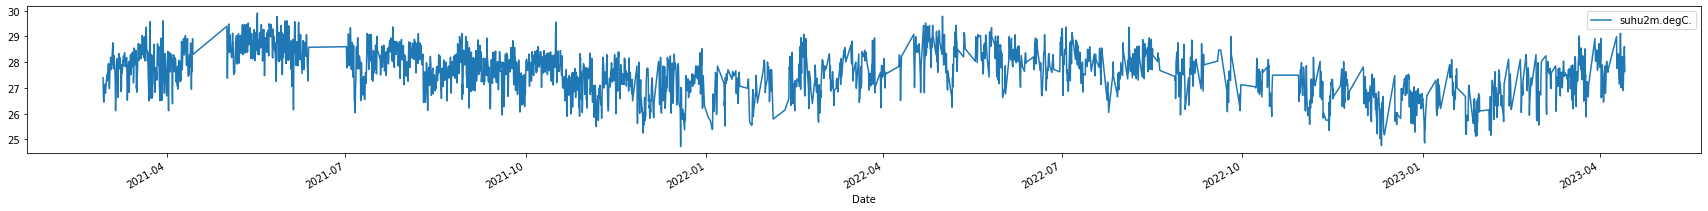

In [133]:
suhu2m_maimun_saleh[['suhu2m.degC.']].plot(figsize=(30,3))

C:\Users\Nycht\AppData\Local\Temp\ipykernel_14288\2525601549.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  suhu2m_maimun_saleh[['suhu2m.degC.','t_obs']]['2023-04-12'].plot(figsize=(30,3), legend=True)


<Axes: xlabel='Date'>

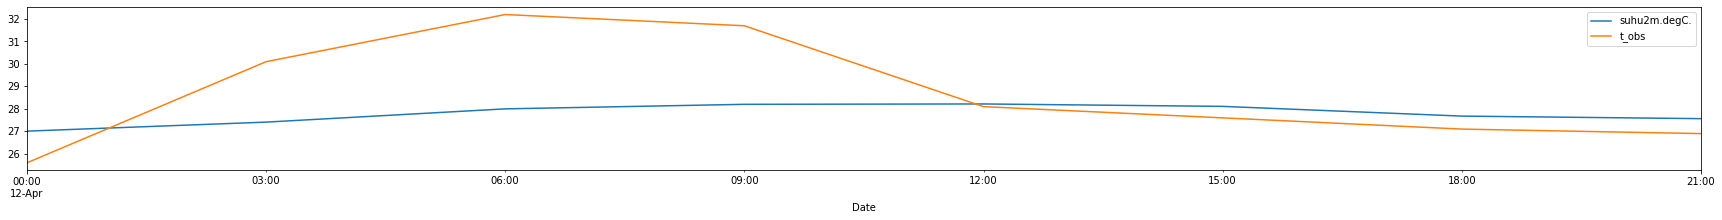

In [134]:
suhu2m_maimun_saleh[['suhu2m.degC.','t_obs']]['2023-04-12'].plot(figsize=(30,3), legend=True)

In [141]:
(weather_processed['sha_prec.mm.'] == 0).sum()/weather_processed.shape[0]

1.0

In [142]:
(weather_processed['clmix.kg.kg.'] == 0).sum()/weather_processed.shape[0]

0.9507252898024217

In [143]:
(weather_processed['mdbz'] == 0).sum()/weather_processed.shape[0]

0.8957098545732168

In [144]:
(weather_processed['hari'] == 0).sum()/weather_processed.shape[0]

0.8394514869086389

In [145]:
weather_processed = weather_processed.drop(columns=['sha_prec.mm.', 'clmix.kg.kg.', 'mdbz', 'hari'])

In [146]:
weather_processed

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,UTC,LAT,LON,ELEV,t_obs,Nama UPT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-27 15:00:00,96001,0.000000,0.000000e+00,27.3973,21.6059,70.8014,3.433260,12.4580,0.553781,0.000000,0.000000,100564.0,0.014986,299.737,770.659,908.410,38.5747,22.3437,81.3926,3.518960,12.6254,17.0906,20.4601,0.76722,281.622,-5.20890,11.0889,6.22327,57.5841,12,5.87655,95.33785,126,23.2,Stasiun Meteorologi Maimun Saleh
2021-02-27 15:00:00,96221,0.000000,0.000000e+00,23.9051,23.2945,96.5338,1.676270,19.4949,0.218066,0.000000,0.000000,100895.0,0.017470,283.305,140.778,1146.140,788.8210,25.7319,76.6835,3.095530,322.9900,16.7669,57.0906,9.49259,300.230,-5.57943,47.5819,6.98853,101.6120,12,-2.89468,104.70129,10,27.0,Stasiun Meteorologi Sultan Mahmud Badaruddin II
2021-02-27 15:00:00,96237,0.000000,0.000000e+00,23.2622,22.5789,96.0981,2.479190,347.5040,0.179668,0.000000,0.069829,100410.0,0.017546,281.796,180.344,442.069,380.9380,24.8939,72.0411,5.985540,316.6470,17.7241,30.5139,6.71454,323.581,-5.45870,42.5963,7.09173,117.0970,12,-2.17000,106.13000,0,25.7,Stasiun Meteorologi Depati Amir
2021-02-27 15:00:00,96249,0.000000,0.000000e+00,23.1734,22.0476,93.5438,2.098030,11.0541,0.205014,0.000000,0.210649,100384.0,0.017196,279.020,141.494,560.311,364.4790,24.2376,67.0358,6.418530,341.6330,17.4701,41.1291,5.35031,337.946,-5.12427,43.6112,6.71174,148.6470,12,-2.75000,107.75000,50,25.3,Stasiun Meteorologi H. AS. Hananjoeddin
2021-02-27 15:00:00,97690,0.000000,2.706140e-07,20.2130,20.1840,100.0000,0.680817,288.1390,1.000000,0.148853,0.509476,95692.8,0.017244,270.746,102.095,250.718,552.9090,22.1205,98.7348,3.292850,279.3090,16.3862,66.4408,6.01171,303.243,-6.38179,69.9458,8.21554,49.8520,12,-2.57000,140.48000,96,25.4,Stasiun Meteorologi Sentani
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13 21:00:00,96791,0.133083,0.000000e+00,24.9108,21.6275,82.1334,2.036490,185.2650,0.772454,0.633468,0.593371,100517.0,0.015750,202.234,363.676,1448.150,38.7637,23.8093,78.2550,3.210750,203.2610,15.2015,90.6686,4.66484,258.882,-4.92020,70.6699,2.52175,208.6960,12,-6.73440,108.26300,85,25.9,Stasiun Meteorologi Jatiwangi
2023-04-13 21:00:00,96145,0.000000,0.000000e+00,27.3588,22.4658,74.7796,2.990940,43.9587,0.837277,0.000000,0.000000,100087.0,0.016215,289.314,762.549,760.652,511.2290,22.7002,86.6194,3.020640,39.6342,16.7078,28.5437,5.07916,304.727,-5.69569,36.4828,2.41618,288.1610,12,3.20000,106.25000,2,24.6,Stasiun Meteorologi Tarempa
2023-04-13 21:00:00,96559,0.000000,0.000000e+00,20.8423,19.9679,94.9125,1.590740,286.1080,0.307909,0.000000,0.000000,100654.0,0.014831,269.957,107.225,812.218,-0.1000,23.3122,76.3191,7.816570,264.3300,15.7605,64.5183,5.33762,229.192,-5.18820,45.7200,8.28509,254.4330,12,0.06000,111.47000,31,23.6,Stasiun Meteorologi Tebelian


In [ ]:
train = weather.sort_index().loc[:'10/11/2022 09:00']
test = weather.sort_index().loc['10/11/2022 09:00':]

In [ ]:
print(train.shape)
print(test.shape)

(439658, 34)
(104766, 34)


In [ ]:
predictor = train.drop(columns='t_obs')
predictor

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,UTC,LAT,LON,ELEV
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-27 15:00:00,96001,0.000000,0.000000e+00,27.3973,21.6059,70.8014,3.433260,12.458,0.553781,0.000000,0.000000,100564.0,0.014986,299.737,770.6590,908.4100,38.5747,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.76722,281.622,-5.20890,11.0889,6.22327,57.5841,12,5.87655,95.33785,126
2021-02-27 15:00:00,97270,0.000000,0.000000e+00,22.9105,21.3066,90.8367,1.384810,197.264,0.176021,0.781184,0.247383,99142.5,0.015960,247.693,26.1603,773.3720,107.3550,23.6593,79.0267,3.47518,205.0050,15.4533,74.4511,3.01279,161.364,-4.04637,29.2443,5.82203,155.9980,12,-8.54279,118.69280,5
2021-02-27 15:00:00,96015,0.000000,1.605160e-28,28.0655,23.8989,78.2397,2.654820,304.990,0.894885,0.335884,0.000000,100897.0,0.017458,289.454,225.8590,689.3250,1240.7000,23.2124,88.8533,4.64216,281.0180,15.3833,81.3255,2.35546,24.532,-5.27618,15.7060,8.77849,56.6987,12,4.04928,96.24796,3
2021-02-27 15:00:00,97260,0.058173,0.000000e+00,23.8189,21.3126,86.0171,0.299703,159.642,0.513390,0.609909,0.613173,100080.0,0.015705,201.383,26.2168,1001.0800,57.4415,24.1170,75.5153,2.62942,177.2210,14.7733,84.8162,4.11494,143.753,-4.35979,54.6991,3.95726,149.2200,12,-8.48845,117.41340,10
2021-02-27 15:00:00,97240,3.211410,6.649530e-01,23.4862,22.7559,95.8292,2.397250,340.483,0.959024,1.000000,0.652274,99868.2,0.017404,155.345,263.8210,282.2340,331.7820,21.7682,93.6588,7.91355,226.3270,14.7228,94.5571,7.83427,163.157,-5.46897,88.2311,6.52995,187.9740,12,-8.75277,116.24980,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-11 09:00:00,97682,1.592270,0.000000e+00,24.4938,24.2651,98.7820,0.847479,317.958,0.895389,0.720788,0.644798,99066.8,0.019018,128.566,206.3370,198.8810,1548.9600,22.8868,94.1715,3.31857,294.1790,15.3411,92.3120,6.47749,240.627,-5.07462,86.4804,2.26266,114.4990,12,-3.35210,135.52000,3
2022-10-11 09:00:00,97460,0.106739,0.000000e+00,23.6821,23.5159,99.1547,3.054390,251.766,1.000000,0.629780,0.841939,96315.4,0.018908,124.738,318.5080,122.8420,2082.4800,22.7626,100.0000,5.13770,251.6810,15.9371,77.8596,7.34550,246.917,-5.70565,92.4357,5.86829,34.8388,12,-0.63784,127.50000,14
2022-10-11 09:00:00,97150,1.688190,1.306280e-07,28.4965,24.0424,76.9602,1.044300,204.480,0.551822,0.389513,0.723943,99542.3,0.018093,217.382,1084.3400,766.2960,2294.1300,24.9881,81.0492,3.54190,183.6320,16.2086,70.4740,3.45185,146.494,-5.76509,77.5022,3.71536,116.5810,12,-4.05600,122.44900,30


In [ ]:
target = train['t_obs']
target

Date
2021-02-27 15:00:00    23.2
2021-02-27 15:00:00    25.8
2021-02-27 15:00:00    26.8
2021-02-27 15:00:00    24.8
2021-02-27 15:00:00    24.0
                       ... 
2022-10-11 09:00:00    29.0
2022-10-11 09:00:00    29.0
2022-10-11 09:00:00    27.2
2022-10-11 09:00:00    24.0
2022-10-11 09:00:00    30.6
Name: t_obs, Length: 439658, dtype: float64

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(random_state=42, verbose=1)

In [ ]:
etr.fit(predictor, target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 10.0min finished


ExtraTreesRegressor(random_state=42, verbose=1)

In [ ]:
prediction = etr.predict(test.drop(columns=['t_obs']))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.7s finished


In [ ]:
print(f'MSE : {mean_squared_error(test["t_obs"], prediction)}')
print(f'MAE : {mean_absolute_error(test["t_obs"], prediction)}')
print(f'R2 : {r2_score(test["t_obs"], prediction)}')

MSE : 2.093382803540826
MAE : 1.1037414164832648
R2 : 0.7704529244845431


In [ ]:
combined = pd.concat([test["t_obs"], pd.Series(prediction, index = test.drop(columns=['t_obs']).index)], axis=1)
combined.columns = ['actual', 'prediction']

In [ ]:
combined.tail(50)

,actual,prediction
Date,,
2023-04-13 21:00:00,25.4,26.003000
2023-04-13 21:00:00,25.2,25.811000
2023-04-13 21:00:00,26.6,27.743857
2023-04-13 21:00:00,18.7,19.971000
2023-04-13 21:00:00,26.4,27.389000
2023-04-13 21:00:00,23.3,24.117000
2023-04-13 21:00:00,23.6,25.554000
2023-04-13 21:00:00,24.5,24.979000
2023-04-13 21:00:00,25.6,24.896000
